## Link to Google Drive


In [1]:
!apt-get install -y -qq software-properties-common module-init-tools #python-software-properties ==> no longer exists
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 131323 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&acces

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [11]:
!ls ../../Datasets/MPI-Sintel

bundler  flow_code  README.txt	test  training


In [0]:
import os
os.chdir('drive/ColabNotebooks/tfoptflow/tfoptflow')
os.listdir()

# Optical flow datasets (prep and inspect)

In this notebook we:
- Load the optical flow datasets and (automatically) create the additional data necessary to train our models (one-time operation on first-time load)
- Show sample images/flows from each dataset. Note that you must have donwloaded and unpacked the master data files already. See [[Datasets]](https://github.com/philferriere/tf-optflow/blob/master/README.md#datasets) for download links to each dataset.

In [0]:
"""
dataset_prep.py

Dataset preparation.

Written by Phil Ferriere

Licensed under the MIT License (see LICENSE for details)
"""
from __future__ import absolute_import, division, print_function
import sys, copy
from dataset_base import _DEFAULT_DS_TRAIN_OPTIONS
from visualize import display_img_pairs_w_flows

# TODO: Set this first!

In [0]:
# TODO: You MUST set dataset_root to the correct path on your machine!
if sys.platform.startswith("win"):
    _DATASET_ROOT = 'E:/datasets/'
    _FLYINGTHINGS3D_ROOT = '//naspro/devt/Datasets/FlyingThings3D'
else:
    _DATASET_ROOT = '../../Datasets'  # '/media/EDrive/datasets/'
    _FLYINGTHINGS3D_ROOT = '/media/YDrive/datasets/FlyingThings3D'

_FLYINGCHAIRS_ROOT = _DATASET_ROOT + 'FlyingChairs_release'
_FLYINGTHINGS3DHALFRES_ROOT = _DATASET_ROOT + 'FlyingThings3D_HalfRes'
_MPISINTEL_ROOT = _DATASET_ROOT + 'MPI-Sintel'
_KITTI2012_ROOT = _DATASET_ROOT + 'KITTI12'
_KITTI2015_ROOT = _DATASET_ROOT + 'KITTI15'
_KITTI_ROOT = _KITTI2015_ROOT

# TODO: Set the following
num_samples = 4 # Number of samples to visualize

In [0]:
_DATASET_ROOT = '../../Datasets/'
_MPISINTEL_ROOT = _DATASET_ROOT + 'MPI-Sintel'
# TODO: Set the following
num_samples = 4 # Number of samples to visualize

# `FlyingThings3D` dataset
Note that with this dataset and `FlyingThings3DHalfRes`, for the same validation split as the one we used below (0.03, or 3%), you may end up with different train and validation number of samples. If the file `all_unused_files.txt` is **not present** in the `FlyingThings3D/frames_cleanpass` folder, `ds.print_config()` should generate the following results:
```
  val_split            0.03
  ...
  train size           19546
  val size             605
```
If it is present, you should get the following results instead:
```
  val_split            0.03
  ...
  train size           19050
  val size             590
```

In [0]:
from dataset_flyingthings3d import FlyingThings3DDataset

In [0]:
# Load the dataset
ds_opts = copy.deepcopy(_DEFAULT_DS_TRAIN_OPTIONS)
ds_opts['in_memory'] = False
ds_opts['aug_type'] = None
ds_opts['crop_preproc'] = None
ds_opts['type'] = 'into_future'
ds = FlyingThings3DDataset(mode='train_with_val', ds_root=_FLYINGTHINGS3D_ROOT, options=ds_opts)

# Display dataset configuration
ds.print_config()


Dataset Configuration:
  verbose              False
  in_memory            False
  crop_preproc         None
  scale_preproc        None
  tb_test_imgs         False
  random_seed          1969
  val_split            0.03
  aug_type             None
  aug_labels           True
  fliplr               0.5
  flipud               0.5
  translate            (0.5, 0.05)
  scale                (0.5, 0.05)
  type                 into_future
  mode                 train_with_val
  train size           19050
  val size             590


In [0]:
# Inspect a few random samples from the dataset
images, gt_labels, ids = ds.get_samples(num_samples, split='train', as_tuple=True)
for image_pair, gt_label in zip(images, gt_labels):
    print(f"Image pair [{image_pair[0].shape},{image_pair[1].shape}], gt label [{gt_label.shape}]")

Image pair [(540, 960, 3),(540, 960, 3)], gt label [(540, 960, 2)]
Image pair [(540, 960, 3),(540, 960, 3)], gt label [(540, 960, 2)]
Image pair [(540, 960, 3),(540, 960, 3)], gt label [(540, 960, 2)]
Image pair [(540, 960, 3),(540, 960, 3)], gt label [(540, 960, 2)]


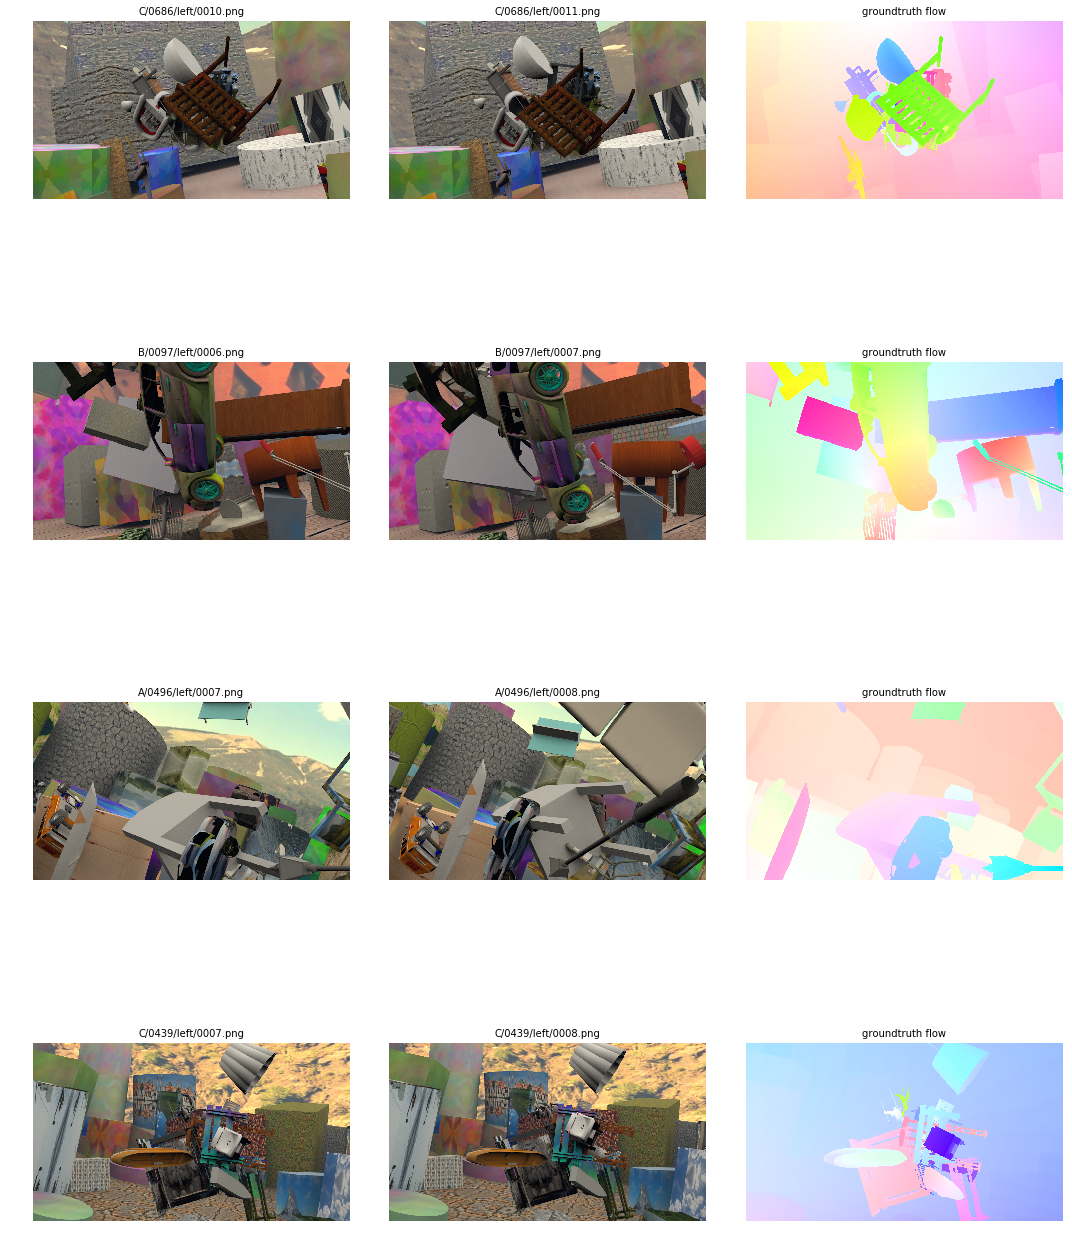

In [0]:
# Display the samples
display_img_pairs_w_flows(images, None, gt_labels, ids)

# `FlyingThings3DHalfRes` dataset

In [0]:
from dataset_flyingthings3d import FlyingThings3DHalfResDataset

In [0]:
# Load the dataset
ds_opts = copy.deepcopy(_DEFAULT_DS_TRAIN_OPTIONS)
ds_opts['in_memory'] = False
ds_opts['aug_type'] = None
ds_opts['crop_preproc'] = None
ds_opts['type'] = 'into_future'
ds = FlyingThings3DHalfResDataset(mode='train_with_val', ds_root=_FLYINGTHINGS3DHALFRES_ROOT, options=ds_opts)

# Display dataset configuration
ds.print_config()


Dataset Configuration:
  verbose              False
  in_memory            False
  crop_preproc         None
  scale_preproc        None
  tb_test_imgs         False
  random_seed          1969
  val_split            0.03
  aug_type             None
  aug_labels           True
  fliplr               0.5
  flipud               0.5
  translate            (0.5, 0.05)
  scale                (0.5, 0.05)
  type                 into_future
  mode                 train_with_val
  train size           19050
  val size             590


In [0]:
# Inspect a few random samples from the dataset
images, gt_labels, ids = ds.get_samples(num_samples, split='train', as_tuple=True)
for image_pair, gt_label in zip(images, gt_labels):
    print(f"Image pair [{image_pair[0].shape},{image_pair[1].shape}], gt label [{gt_label.shape}]")

Image pair [(270, 480, 3),(270, 480, 3)], gt label [(270, 480, 2)]
Image pair [(270, 480, 3),(270, 480, 3)], gt label [(270, 480, 2)]
Image pair [(270, 480, 3),(270, 480, 3)], gt label [(270, 480, 2)]
Image pair [(270, 480, 3),(270, 480, 3)], gt label [(270, 480, 2)]


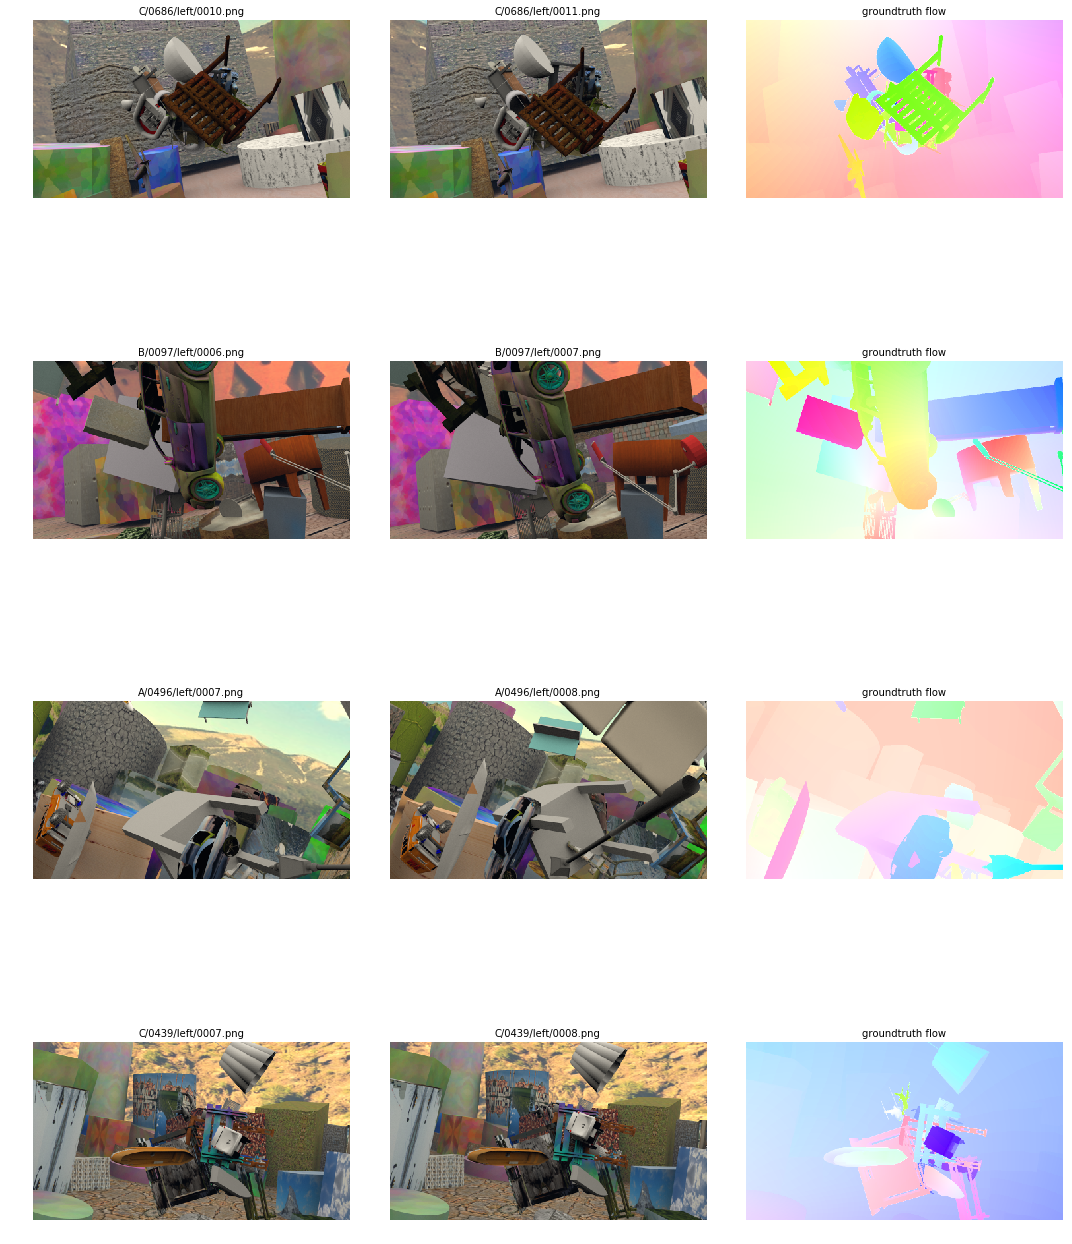

In [0]:
# Display the samples
display_img_pairs_w_flows(images, None, gt_labels, ids)

# `FlyingChairsDataset` dataset

In [0]:
from dataset_flyingchairs import FlyingChairsDataset

In [0]:
# Load the dataset
ds_opts = copy.deepcopy(_DEFAULT_DS_TRAIN_OPTIONS)
ds_opts['in_memory'] = False
ds_opts['aug_type'] = None
ds_opts['crop_preproc'] = None
ds = FlyingChairsDataset(mode='train_with_val', ds_root=_FLYINGCHAIRS_ROOT, options=ds_opts)

# Display dataset configuration
ds.print_config()


Dataset Configuration:
  verbose              False
  in_memory            False
  crop_preproc         None
  scale_preproc        None
  tb_test_imgs         False
  random_seed          1969
  val_split            0.03
  aug_type             None
  aug_labels           True
  fliplr               0.5
  flipud               0.5
  translate            (0.5, 0.05)
  scale                (0.5, 0.05)
  mode                 train_with_val
  train size           22232
  val size             640


In [0]:
# Inspect a few random samples from the dataset
images, gt_labels, ids = ds.get_samples(num_samples, split='train', as_tuple=True)
for image_pair, gt_label in zip(images, gt_labels):
    print(f"Image pair [{image_pair[0].shape},{image_pair[1].shape}], gt label [{gt_label.shape}]")

Image pair [(384, 512, 3),(384, 512, 3)], gt label [(384, 512, 2)]
Image pair [(384, 512, 3),(384, 512, 3)], gt label [(384, 512, 2)]
Image pair [(384, 512, 3),(384, 512, 3)], gt label [(384, 512, 2)]
Image pair [(384, 512, 3),(384, 512, 3)], gt label [(384, 512, 2)]


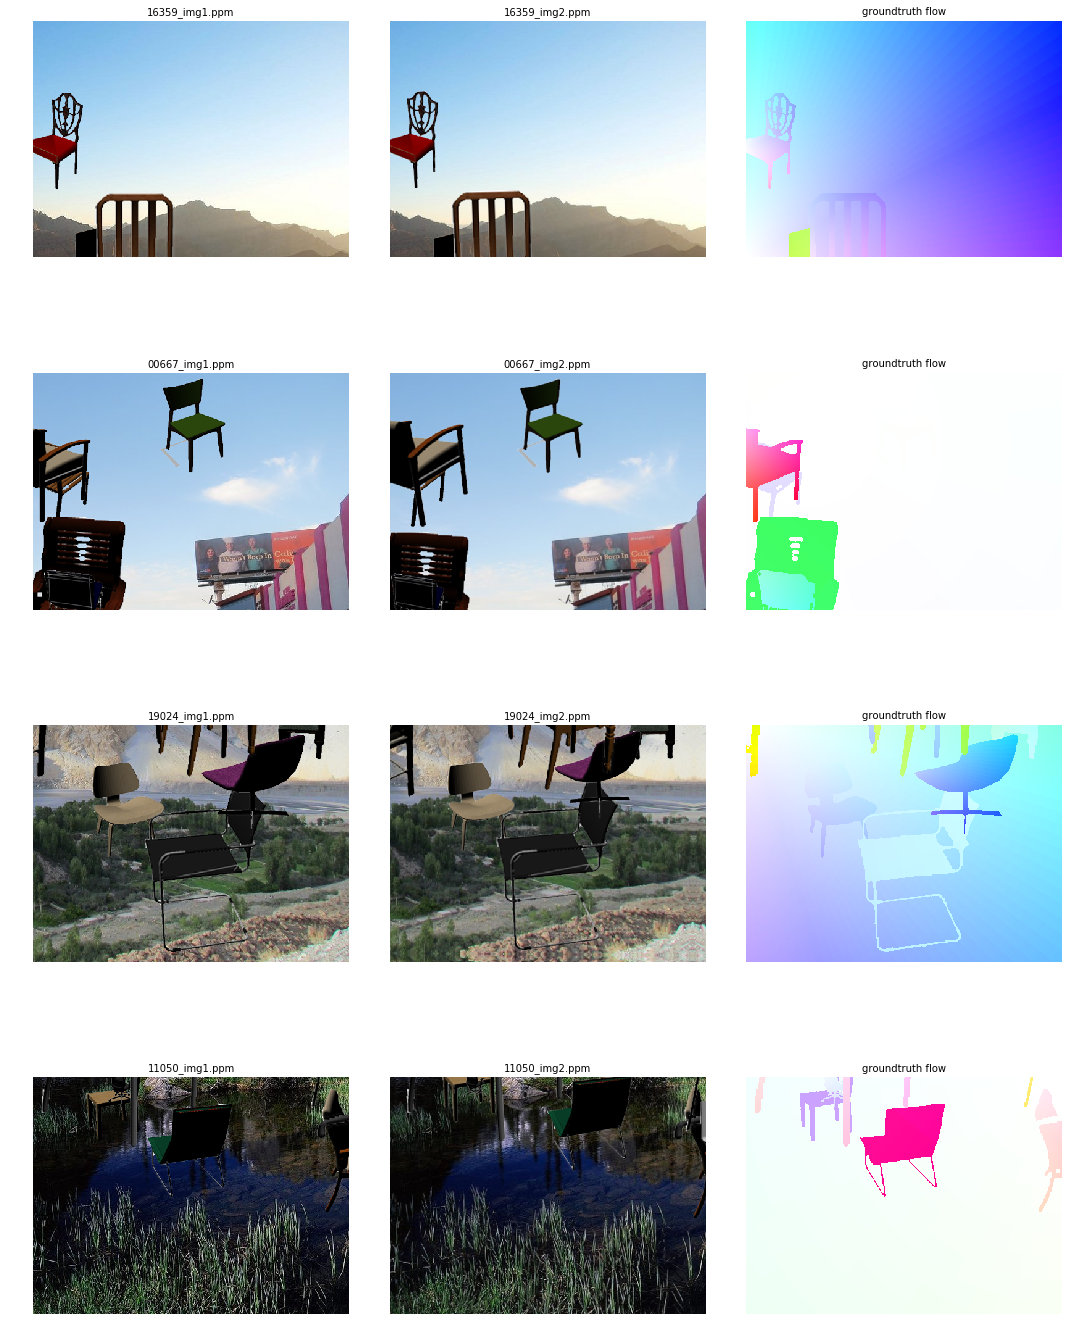

In [0]:
# Display the samples
display_img_pairs_w_flows(images, None, gt_labels, ids)

# `MPISintelDataset` dataset

In [0]:
from dataset_mpisintel import MPISintelDataset

In [17]:
# Load the dataset
ds_opts = copy.deepcopy(_DEFAULT_DS_TRAIN_OPTIONS)
ds_opts['in_memory'] = False
ds_opts['aug_type'] = None
ds_opts['crop_preproc'] = None
ds_opts['type'] = 'final'
ds = MPISintelDataset(mode='train_with_val', ds_root=_MPISINTEL_ROOT, options=ds_opts)

# Display dataset configuration
ds.print_config()


Dataset Configuration:
  verbose              False
  in_memory            False
  crop_preproc         None
  scale_preproc        None
  tb_test_imgs         False
  random_seed          1969
  val_split            0.03
  aug_type             None
  aug_labels           True
  fliplr               0.5
  flipud               0.5
  translate            (0.5, 0.05)
  scale                (0.5, 0.05)
  type                 final
  mode                 train_with_val
  train size           1009
  val size             32


In [18]:
# Inspect a few random samples from the dataset
images, gt_labels, ids = ds.get_samples(num_samples, split='train', as_tuple=True)
for image_pair, gt_label in zip(images, gt_labels):
    print(f"Image pair [{image_pair[0].shape},{image_pair[1].shape}], gt label [{gt_label.shape}]")

Image pair [(436, 1024, 3),(436, 1024, 3)], gt label [(436, 1024, 2)]
Image pair [(436, 1024, 3),(436, 1024, 3)], gt label [(436, 1024, 2)]
Image pair [(436, 1024, 3),(436, 1024, 3)], gt label [(436, 1024, 2)]
Image pair [(436, 1024, 3),(436, 1024, 3)], gt label [(436, 1024, 2)]


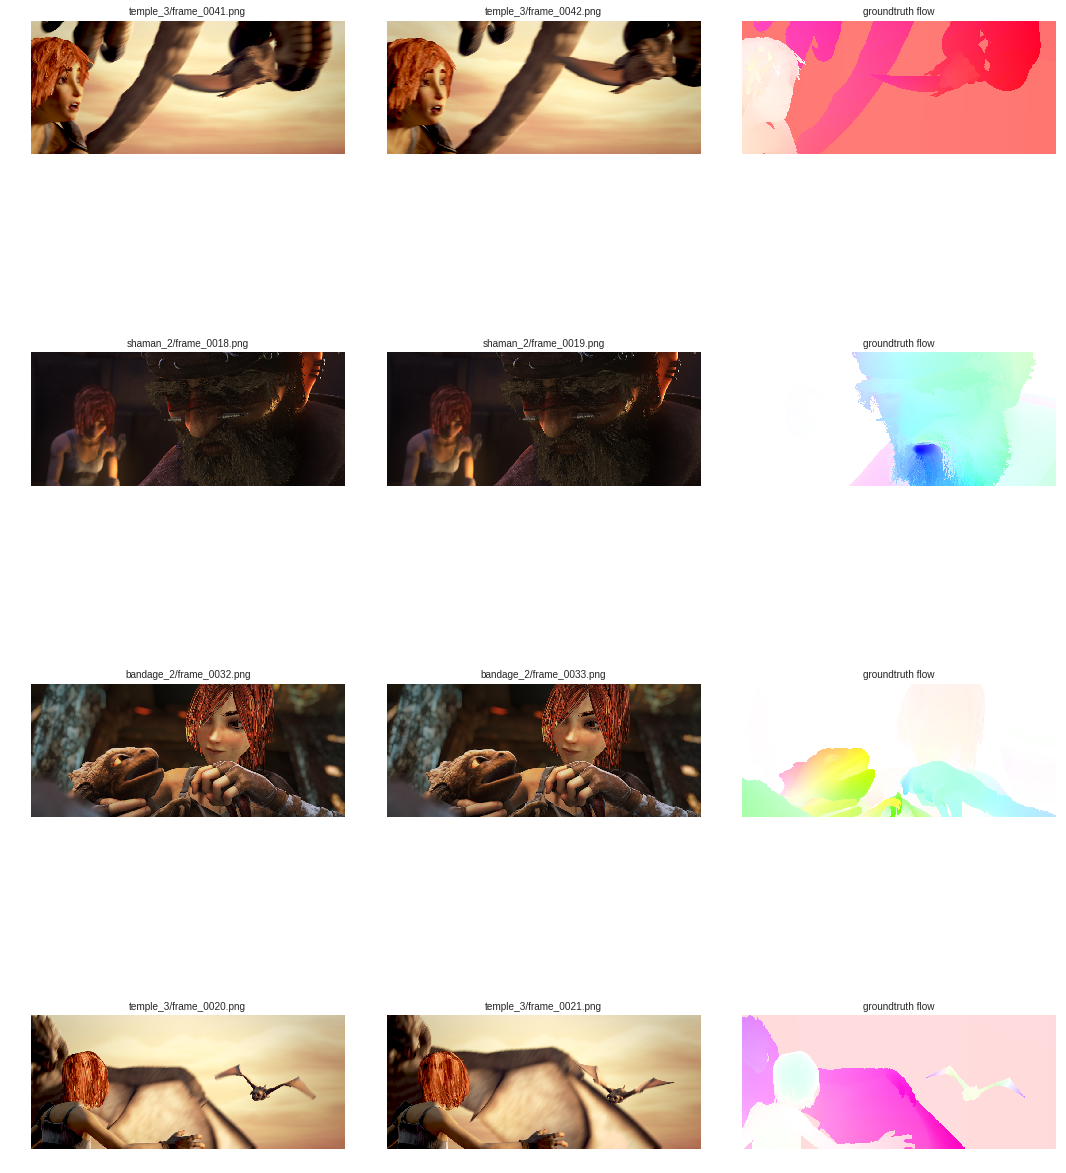

In [19]:
# Display the samples
display_img_pairs_w_flows(images, None, gt_labels, ids)

# `KITTI2012Dataset` dataset

In [0]:
from dataset_kitti import KITTIDataset

In [0]:
# Load the dataset
ds_opts = copy.deepcopy(_DEFAULT_DS_TRAIN_OPTIONS)
ds_opts['in_memory'] = False
ds_opts['aug_type'] = None
ds_opts['crop_preproc'] = None
ds_opts['type'] = 'noc'
ds = KITTIDataset(mode='train_with_val', ds_root=_KITTI2012_ROOT, options=ds_opts)

# Display dataset configuration
ds.print_config()


Dataset Configuration:
  verbose              False
  in_memory            False
  crop_preproc         None
  scale_preproc        None
  tb_test_imgs         False
  random_seed          1969
  val_split            0.03
  aug_type             None
  aug_labels           True
  fliplr               0.5
  flipud               0.5
  translate            (0.5, 0.05)
  scale                (0.5, 0.05)
  type                 noc
  mode                 train_with_val
  train size           188
  val size             6


In [0]:
# Inspect a few random samples from the dataset
images, gt_labels, ids = ds.get_samples(num_samples, split='train', as_tuple=True)
for image_pair, gt_label in zip(images, gt_labels):
    print(f"Image pair [{image_pair[0].shape},{image_pair[1].shape}], gt label [{gt_label.shape}]")

Image pair [(376, 1241, 3),(376, 1241, 3)], gt label [(376, 1241, 2)]
Image pair [(375, 1242, 3),(375, 1242, 3)], gt label [(375, 1242, 2)]
Image pair [(375, 1242, 3),(375, 1242, 3)], gt label [(375, 1242, 2)]
Image pair [(374, 1238, 3),(374, 1238, 3)], gt label [(374, 1238, 2)]


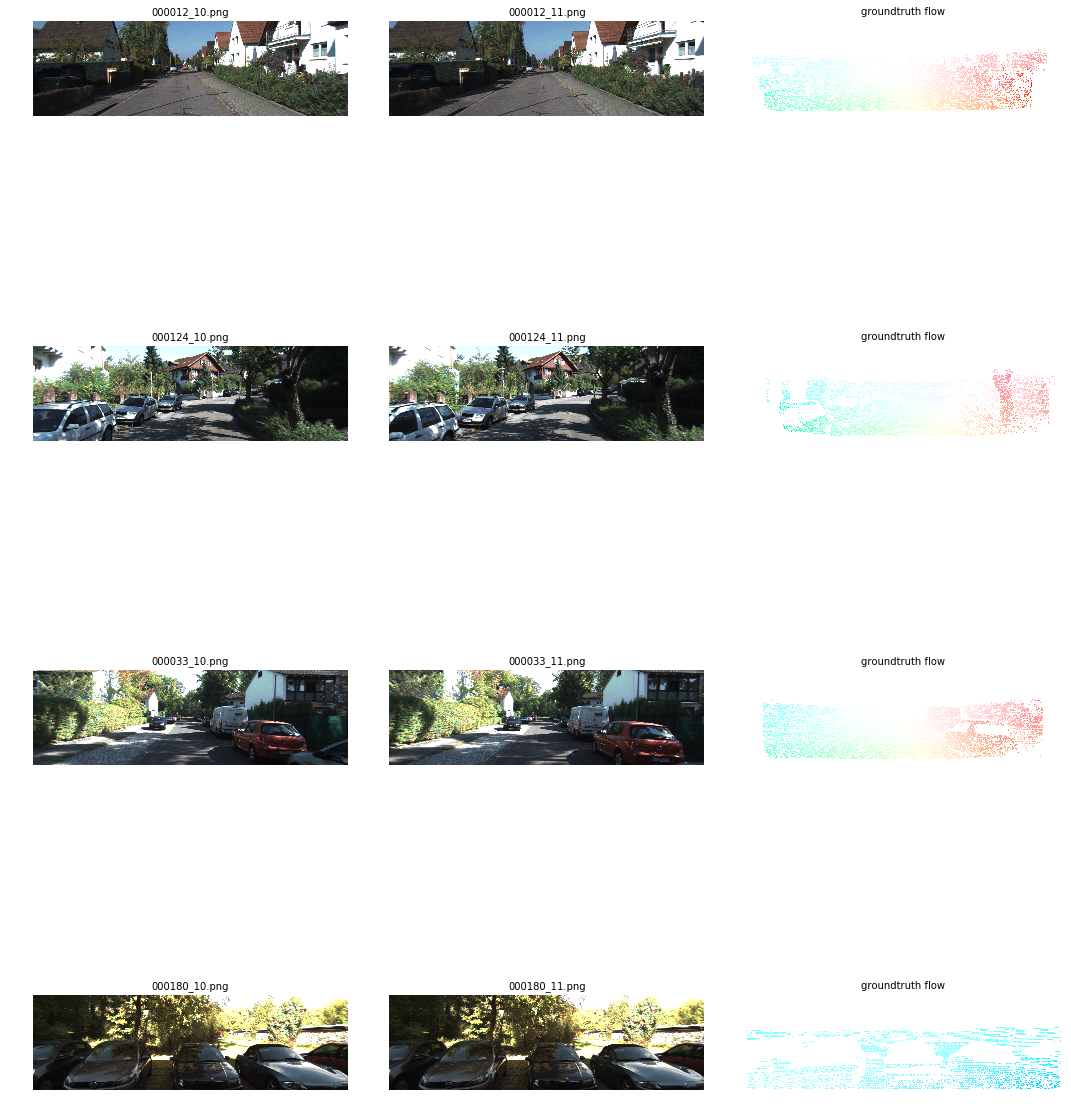

In [0]:
# Display the samples
display_img_pairs_w_flows(images, None, gt_labels, ids)

# `KITTI2015Dataset` dataset

In [0]:
# Load the dataset
ds_opts = copy.deepcopy(_DEFAULT_DS_TRAIN_OPTIONS)
ds_opts['in_memory'] = False
ds_opts['aug_type'] = None
ds_opts['crop_preproc'] = None
ds_opts['type'] = 'noc'
ds = KITTIDataset(mode='train_with_val', ds_root=_KITTI2015_ROOT, options=ds_opts)

# Display dataset configuration
ds.print_config()


Dataset Configuration:
  verbose              False
  in_memory            False
  crop_preproc         None
  scale_preproc        None
  tb_test_imgs         False
  random_seed          1969
  val_split            0.03
  aug_type             None
  aug_labels           True
  fliplr               0.5
  flipud               0.5
  translate            (0.5, 0.05)
  scale                (0.5, 0.05)
  type                 noc
  mode                 train_with_val
  train size           194
  val size             6


In [0]:
# Inspect a few random samples from the dataset
images, gt_labels, ids = ds.get_samples(num_samples, split='train', as_tuple=True)
for image_pair, gt_label in zip(images, gt_labels):
    print(f"Image pair [{image_pair[0].shape},{image_pair[1].shape}], gt label [{gt_label.shape}]")

Image pair [(375, 1242, 3),(375, 1242, 3)], gt label [(375, 1242, 2)]
Image pair [(376, 1241, 3),(376, 1241, 3)], gt label [(376, 1241, 2)]
Image pair [(374, 1238, 3),(374, 1238, 3)], gt label [(374, 1238, 2)]
Image pair [(375, 1242, 3),(375, 1242, 3)], gt label [(375, 1242, 2)]


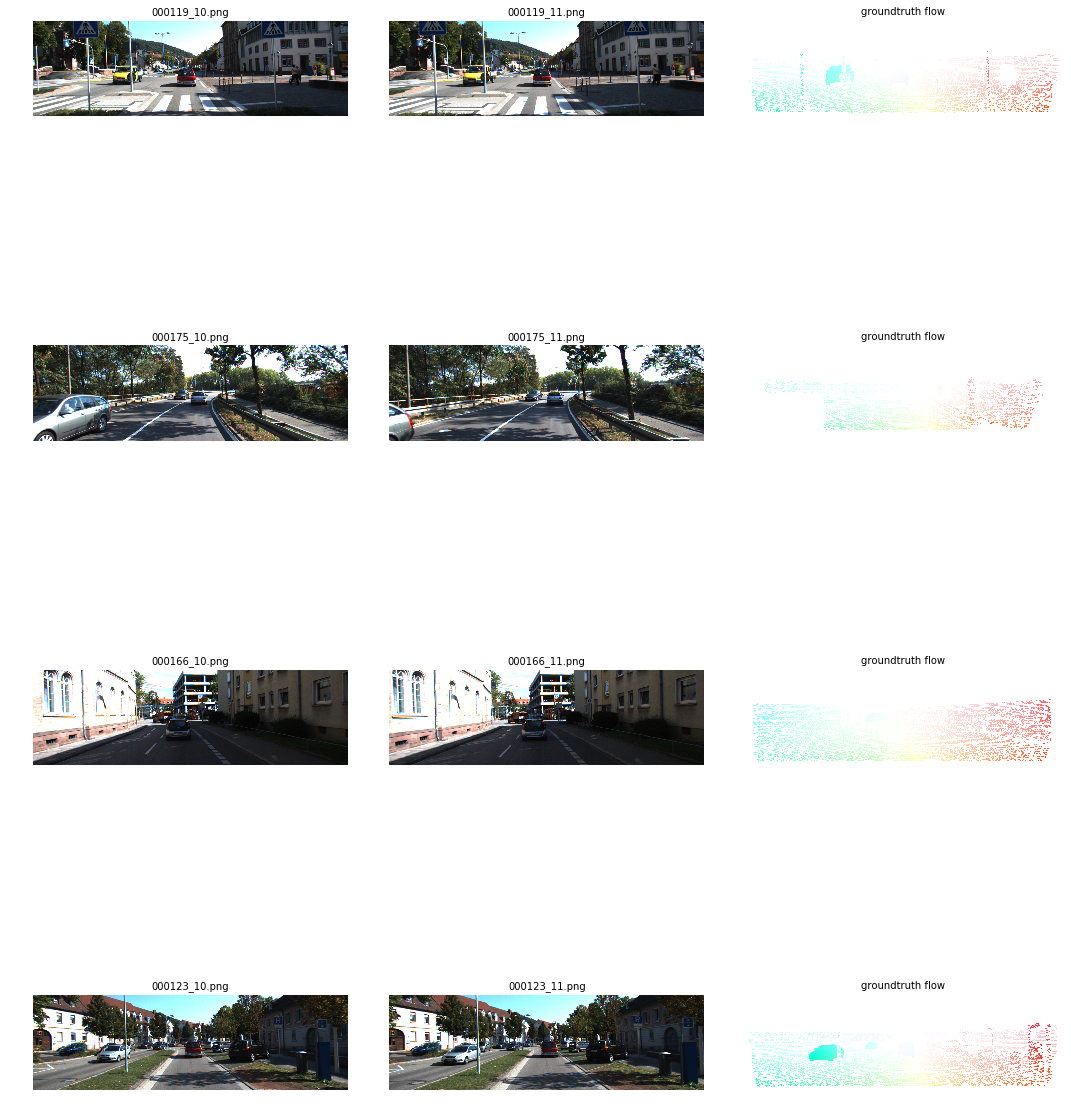

In [0]:
# Display the samples
display_img_pairs_w_flows(images, None, gt_labels, ids)